In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from chart import show, show_collection

import numpy as np
from skimage import io, color

### Math Morphology

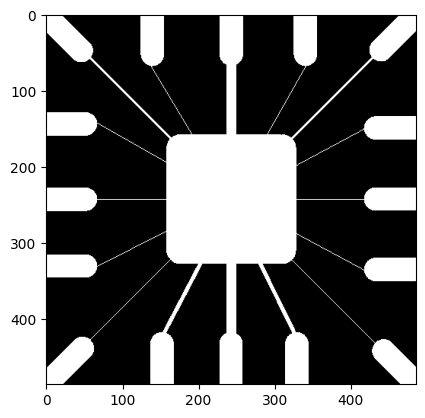

In [17]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

image = np.logical_not(io.imread('wirebond.tif'))
image = image.astype(int)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

#### Erosion

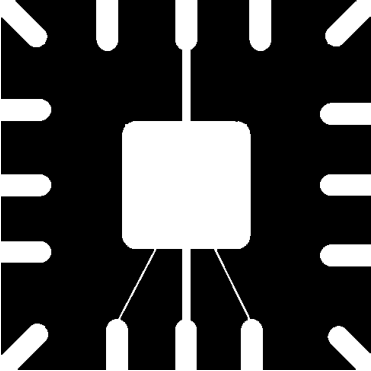

In [25]:
from skimage.morphology import square, erosion
from chart import show

# create a square structured element
selem = square(3)  # you can change the size of the square as needed

# erode the image
eroded_image = erosion(image, selem)

# display the eroded image
show(eroded_image, cmap=plt.cm.gray, scale=0.1)


#### Erosion with multiple structuring elements

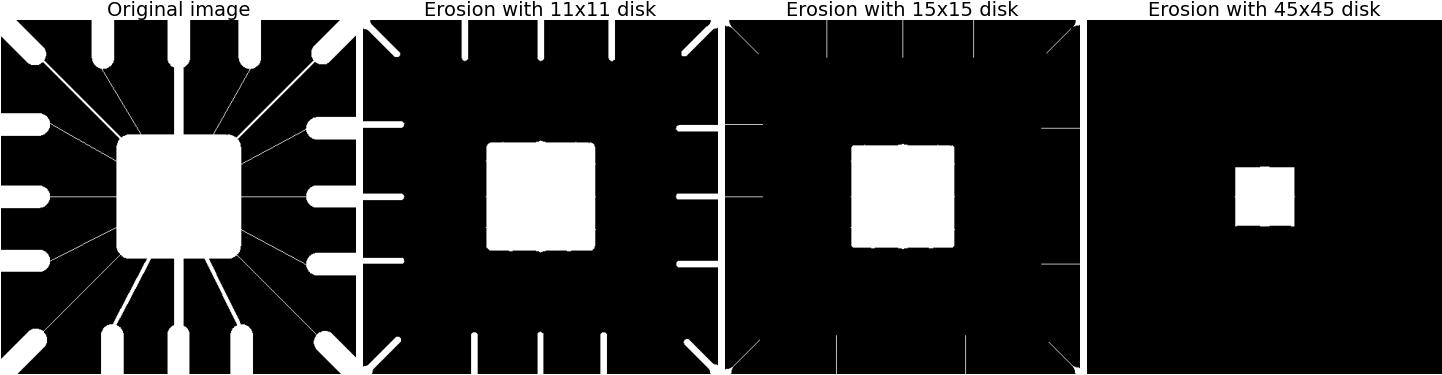

In [38]:
from skimage.morphology import disk, erosion
from chart import show_collection

# eroded images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [11, 15, 45]:
    selem = disk(s)
    eroded_image = erosion(image, selem)
    images.append(eroded_image)
    titles.append('Erosion with {}x{} disk'.format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap=plt.cm.gray)

### Dilation

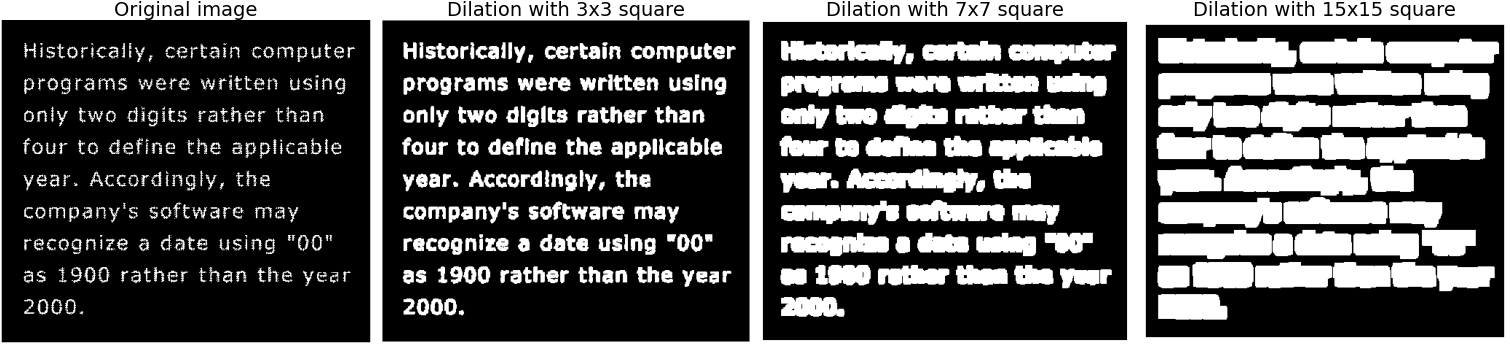

In [41]:
from skimage.morphology import square, dilation
from chart import show_collection

# load the image
image = io.imread("text.tif")

# dilated images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [3, 7, 15]:
    selem = square(s)
    eroded_image = dilation(image, selem)
    images.append(eroded_image)
    titles.append("Dilation with {}x{} square".format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap=plt.cm.gray)

### Closing

$A \bullet B = (A \oplus B) \ominus B$

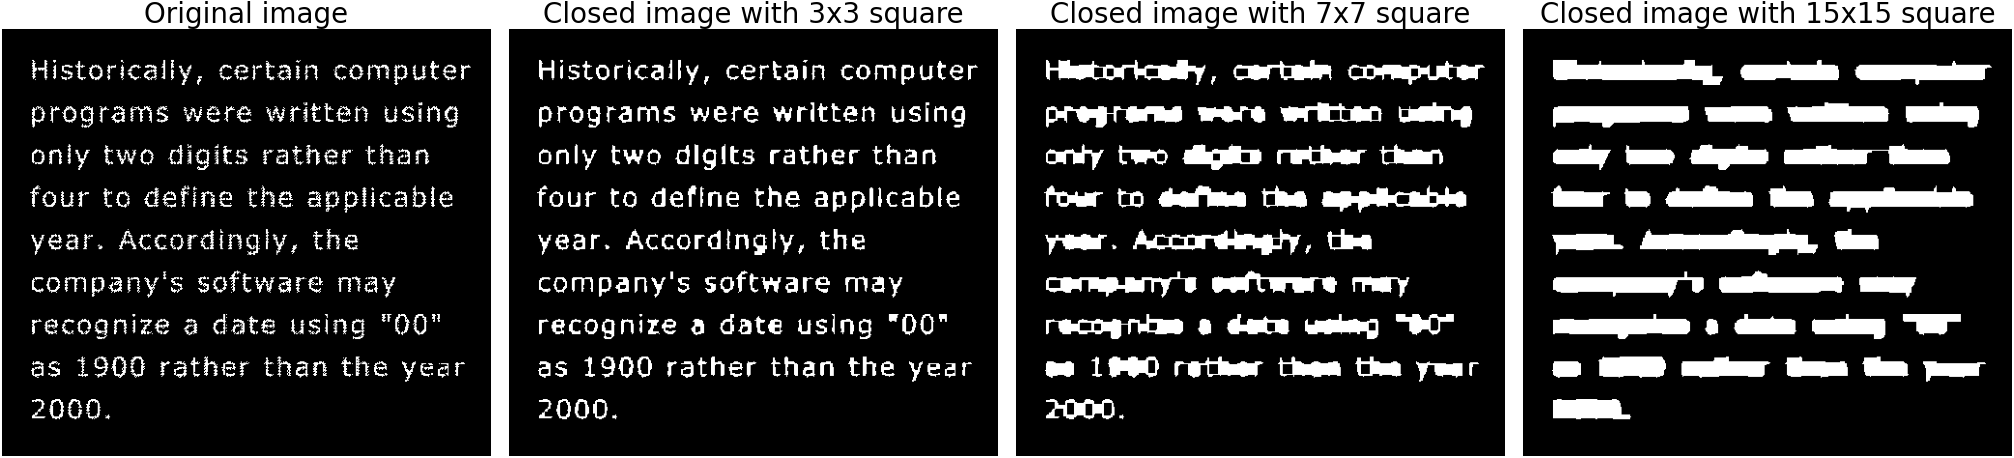

In [53]:
from skimage.morphology import square, opening, closing
import matplotlib.pyplot as plt

# load the image
image = io.imread("text.tif")

# images after closing
images = [image]
titles = ["Original image"]

for s in [3, 7, 15]:
    # Define the structuring element
    selem = square(s)
    
    # Perform closing
    closed = closing(image, selem)
    images.append(closed)

    titles.append("Closed image with {}x{} square".format(s, s))

show_collection(images, titles, fontsize=20, scale=0.1, cmap=plt.cm.gray)

Filtering binary images with opening and closing. The opening operation is defined as:

$A \circ B = (A \ominus B) \oplus B$

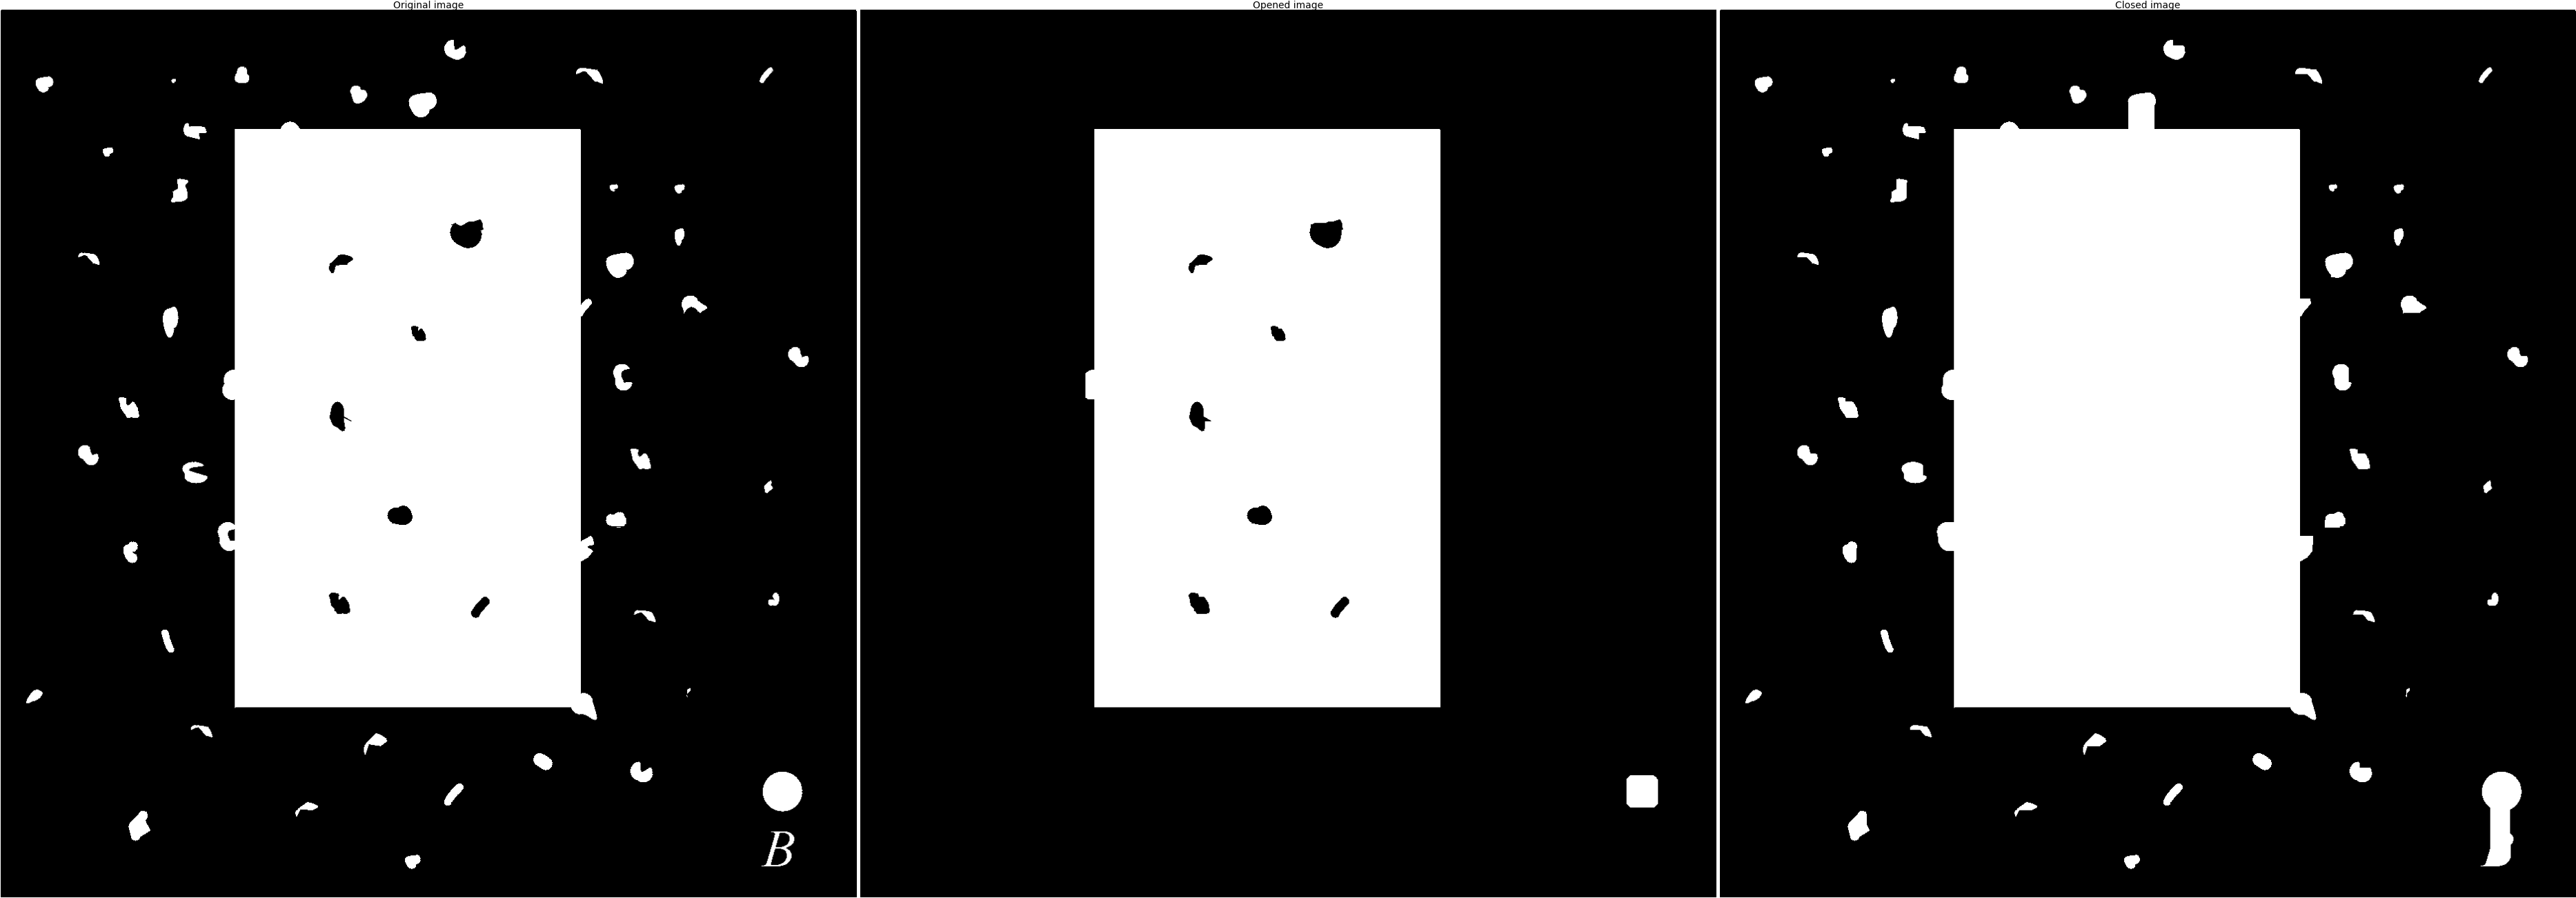

In [45]:
from skimage.morphology import square, opening, closing
import matplotlib.pyplot as plt

# load the image
image = io.imread("noisy.tif")

# Define the structuring element
selem = square(35)

# Perform opening and closing
opened = opening(image, selem)
closed = closing(image, selem)
titles = ['Original image', 'Opened image', 'Closed image']

show_collection([image, opened, closed], titles, scale=0.1, cmap=plt.cm.gray)